Define libraries:

In [221]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np


Define file paths for processed CSV data:

In [222]:
CLEAN_HOPS_PATH = './rc_clean_data/rc_cln_hops_brewvalues.csv'
CLEAN_HOPS_PROFILE_PATH = './rc_clean_data/rc_cln_hops_profile.csv'


Read in raw CSV data into local dataframes with index as the Hop Name:

In [223]:
hops_v = pd.read_csv(CLEAN_HOPS_PATH, index_col='Hop Name')
hops_p = pd.read_csv(CLEAN_HOPS_PROFILE_PATH, index_col='Hop Name')


Combine dataframes to have all the hop data in one dataframe:

In [224]:
hops_main = pd.concat([hops_v, hops_p], axis=1)
hops_main.head()


,Alpha Acid % - Min,Alpha Acid % - Max,Alpha Acid % - Avg,Beta Acid % - Min,Beta Acid % - Max,Beta Acid % - Avg,Alpha-Beta Ratio - Min,Alpha-Beta Ratio - Max,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Min,...,violet,watermelon,whiskey,white_grape,white_wine,wild,wine,woody,yogurt,zest
Hop Name,,,,,,,,,,,,,,,,,,,,,
Astra,7.0,10.0,8.5,4.0,6.0,5.0,1.0,3.0,2.0,26.0,...,False,False,False,False,True,False,False,False,False,False
Eclipse,15.7,19.0,17.4,5.9,9.0,7.5,2.0,3.0,2.0,33.0,...,False,False,False,False,False,False,False,False,False,False
Ella,13.3,19.2,16.3,4.0,7.8,5.9,2.0,5.0,3.0,33.0,...,False,False,False,False,False,False,False,False,False,False
Enigma,13.5,19.4,16.5,4.5,7.1,5.8,2.0,4.0,3.0,37.0,...,False,False,False,False,True,False,False,False,False,False
Feux-Coeur Francais,12.0,16.0,14.0,3.1,6.0,4.6,2.0,5.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shorten the country 'United States of America' to 'USA'. This will look cleaner on plots.

In [225]:
hops_main['Country'].replace("United States of America", "USA", inplace=True)


Make a new column for Continent:

In [226]:
hops_main['Continent'] = hops_main['Country'].copy()
hops_main['Continent'].replace({
    'Australia': 'Australia',
    'Canada': 'N. America',
    'China': 'Asia',
    'Czech Republic': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Japan': 'Asia',
    'New Zealand': 'Australia',
    'Poland': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'USA': 'N. America'},
    inplace=True)

hops_main.sample(5)


,Alpha Acid % - Min,Alpha Acid % - Max,Alpha Acid % - Avg,Beta Acid % - Min,Beta Acid % - Max,Beta Acid % - Avg,Alpha-Beta Ratio - Min,Alpha-Beta Ratio - Max,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Min,...,watermelon,whiskey,white_grape,white_wine,wild,wine,woody,yogurt,zest,Continent
Hop Name,,,,,,,,,,,,,,,,,,,,,
Aurora,7.0,13.0,10.0,2.7,5.0,3.9,1.0,5.0,3.0,20.0,...,False,False,False,False,False,False,False,False,False,Europe
Southern Dawn,11.2,13.5,12.4,4.3,5.9,5.1,2.0,3.0,3.0,31.0,...,False,False,False,False,False,False,False,False,False,Africa
Zenith,9.0,11.0,10.0,NaN,NaN,3.0,inf,4.0,inf,NaN,...,False,False,False,False,False,False,False,False,False,N. America
Trident,11.0,14.0,12.5,4.0,5.0,4.5,2.0,4.0,3.0,20.0,...,False,False,False,False,False,False,False,False,False,N. America
Pilgrim,9.0,13.0,11.0,4.2,5.5,4.9,2.0,3.0,2.0,36.0,...,False,False,False,False,False,False,False,False,False,Europe


## Exploratory Data Analysis
### Brewing Value Analysis

Select only the brewing value average columns + 'Purpose', 'Country', and 'Continent'.

In [227]:
hops_bv = pd.DataFrame(hops_main, columns=[
    'Alpha Acid % - Avg',
    'Beta Acid % - Avg',
    'Alpha-Beta Ratio - Avg',
    'Co-Humulone as % of Alpha - Avg',
    'Total Oils (mL/100g) - Avg',
    'Myrcene - Avg',
    'Humulene - Avg',
    'Caryophyllene - Avg',
    'Farnesene - Avg',
    'Purpose',
    'Country',
    'Continent'])

hops_bv.head()


,Alpha Acid % - Avg,Beta Acid % - Avg,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Avg,Total Oils (mL/100g) - Avg,Myrcene - Avg,Humulene - Avg,Caryophyllene - Avg,Farnesene - Avg,Purpose,Country,Continent
Hop Name,,,,,,,,,,,,
Astra,8.5,5.0,2.0,27.0,2.0,NaN,7.0,NaN,NaN,Dual,Australia,Australia
Eclipse,17.4,7.5,2.0,35.0,2.3,42.0,1.0,9.0,0.5,Dual,Australia,Australia
Ella,16.3,5.9,3.0,36.5,2.9,42.0,18.5,11.5,13.0,Dual,Australia,Australia
Enigma,16.5,5.8,3.0,40.0,2.4,26.5,15.5,7.0,10.5,Aroma,Australia,Australia
Feux-Coeur Francais,14.0,4.6,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Bittering,Australia,Australia


Inspect the features of the dataframe:

In [228]:
hops_bv.info()


<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, Astra to Zythos
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Alpha Acid % - Avg               304 non-null    float64
 1   Beta Acid % - Avg                297 non-null    float64
 2   Alpha-Beta Ratio - Avg           281 non-null    float64
 3   Co-Humulone as % of Alpha - Avg  274 non-null    float64
 4   Total Oils (mL/100g) - Avg       287 non-null    float64
 5   Myrcene - Avg                    242 non-null    float64
 6   Humulene - Avg                   236 non-null    float64
 7   Caryophyllene - Avg              220 non-null    float64
 8   Farnesene - Avg                  234 non-null    float64
 9   Purpose                          304 non-null    object 
 10  Country                          304 non-null    object 
 11  Continent                        304 non-null    object 
dtypes: float64(9), objec

Check for null values:

In [229]:
hops_bv.isnull().sum()


Alpha Acid % - Avg                  0
Beta Acid % - Avg                   7
Alpha-Beta Ratio - Avg             23
Co-Humulone as % of Alpha - Avg    30
Total Oils (mL/100g) - Avg         17
Myrcene - Avg                      62
Humulene - Avg                     68
Caryophyllene - Avg                84
Farnesene - Avg                    70
Purpose                             0
Country                             0
Continent                           0
dtype: int64

There are some missing values that were converted into np.nan in previous steps.These must be remove for visualizations and analysis. Dataset without NAs:

In [230]:
hops_bv = hops_bv.dropna(axis=0)
hops_bv.sample(5)


,Alpha Acid % - Avg,Beta Acid % - Avg,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Avg,Total Oils (mL/100g) - Avg,Myrcene - Avg,Humulene - Avg,Caryophyllene - Avg,Farnesene - Avg,Purpose,Country,Continent
Hop Name,,,,,,,,,,,,
Marco Polo,12.5,5.0,3.0,32.5,1.1,45.0,20.0,10.0,0.5,Dual,China,Asia
Bohemie,6.5,7.5,1.0,24.5,1.3,37.5,20.0,8.5,2.0,Aroma,Czech Republic,Europe
Huell Melon,7.5,7.0,1.0,27.5,1.0,36.0,15.0,7.5,0.5,Aroma,Germany,Europe
Pacific Gem,14.0,8.0,2.0,38.5,1.2,33.5,29.5,11.0,0.5,Bittering,New Zealand,Australia
Liberty,4.8,3.5,1.0,26.0,1.2,20.0,40.0,12.5,0.5,Bittering,USA,N. America


Plot of the number of hops per country with Purpose breakdown:

In [231]:
fig = px.bar(hops_bv,
             x="Country",
             color="Purpose",
             labels={
                 "x": "Country", "count": "Count"},
             title="Number of Hops per Country",
             hover_data=['Continent'],
             width=800,
             height=1000)
fig.update_layout(title={
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis={
        'categoryorder': 'total descending'})
fig.write_image("images/HopsPerCountry.png")
fig.show()


This graphic shows the count of hops per country in the dataset. Quite clearly, the United States of America has developed the most hops out of all the countries. Followed by Germany and New Zealand. Europe as a whole would come in second after USA. The colors in the plot represent the use purpose of the hop. Some hops are used specifically for bittering, while others are used more for aromas. Some hops give the best of both worlds and have dual use. Countries like USA and New Zealand have mostly dual-use hops, while European countries such as Germany and Czech Republic have mostly aromatic hops. As hop techniques improve and the focus from using hops as a bittering agent has shifted towards it’s aromatic and flavorful offerings. As it can be seen in the graphic, most hops have either a dual purpose or aromatic purpose.

The last plot suggested that it may be better to view the the plot but per Continent instead of country.Hovering over the bars will show the exact count.

In [232]:
count_cont = hops_bv['Continent'].value_counts()
count_cont

N. America    95
Europe        74
Australia     33
Africa         8
Asia           3
Name: Continent, dtype: int64

In [233]:
fig = px.bar(count_cont, title='Hops per Continent', labels={'value':'Count', 'index':'Continent'}, color=count_cont.index)
fig.update_layout(title={
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis={
        'categoryorder': 'total descending'},
        showlegend=False)

fig.write_image("images/HopsPerContinent.png")
fig.show()

The following violin and box whisker plots are interactive. Use the mouse to hover over the plot to read the values of minimum, maximum, median, and quantiles.

In [234]:
for i in hops_bv.columns[:9]:
    fig = px.violin(hops_bv, y=i, height=500, width=500)
    fig.show()
    if i.startswith("Total"):
        fig.write_image("images/Violin_TotalOil.png")
    else:
        fig.write_image(f"images/Violin_{i}.png")



Box-whisker Plots

In [235]:
for i in hops_bv.columns[:9]:
    fig = px.box(hops_bv, y=i, height=500, width=500)
    fig.show()
    if i.startswith("Total"):
        fig.write_image("images/Box_TotalOil.png")
    else:
        fig.write_image(f"images/Box_{i}.png")


In observing these plots, the average Farnesene columns seems to have the most significant amount and variations with it's outiers.  

Using .describe() the dataset to inspect some importants EDA values such as minimum, maximum, mean, strandard deviation and quartiles.

In [236]:
hops_bv.describe()

,Alpha Acid % - Avg,Beta Acid % - Avg,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Avg,Total Oils (mL/100g) - Avg,Myrcene - Avg,Humulene - Avg,Caryophyllene - Avg,Farnesene - Avg
count,213.000000,213.000000,213.0,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,9.858216,5.330986,inf,29.362911,1.626291,41.880282,20.611737,8.967136,2.905164
std,4.116682,1.633949,NaN,7.512674,0.743947,13.110776,11.135842,3.922462,4.623323
min,2.500000,1.800000,1.0,2.300000,0.600000,3.000000,0.500000,0.500000,0.500000
25%,6.400000,4.000000,1.0,24.000000,1.100000,32.500000,13.500000,6.500000,0.500000
50%,9.500000,5.100000,2.0,28.000000,1.500000,42.000000,18.500000,9.000000,0.500000
75%,13.500000,6.300000,3.0,34.000000,2.000000,50.000000,27.500000,10.500000,3.500000
max,20.500000,10.500000,inf,54.000000,4.500000,71.000000,57.000000,27.500000,26.000000


The following are two pair plots - one with 'Purpose' as the color of the bars, and one with 'Continent' as the bar colors.

To get the darta xonvert 'inf' to np.nan in column 'Alpha-Beta Ratio - Avg' and remove rows with it

Pairplot with Purpose as the color

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



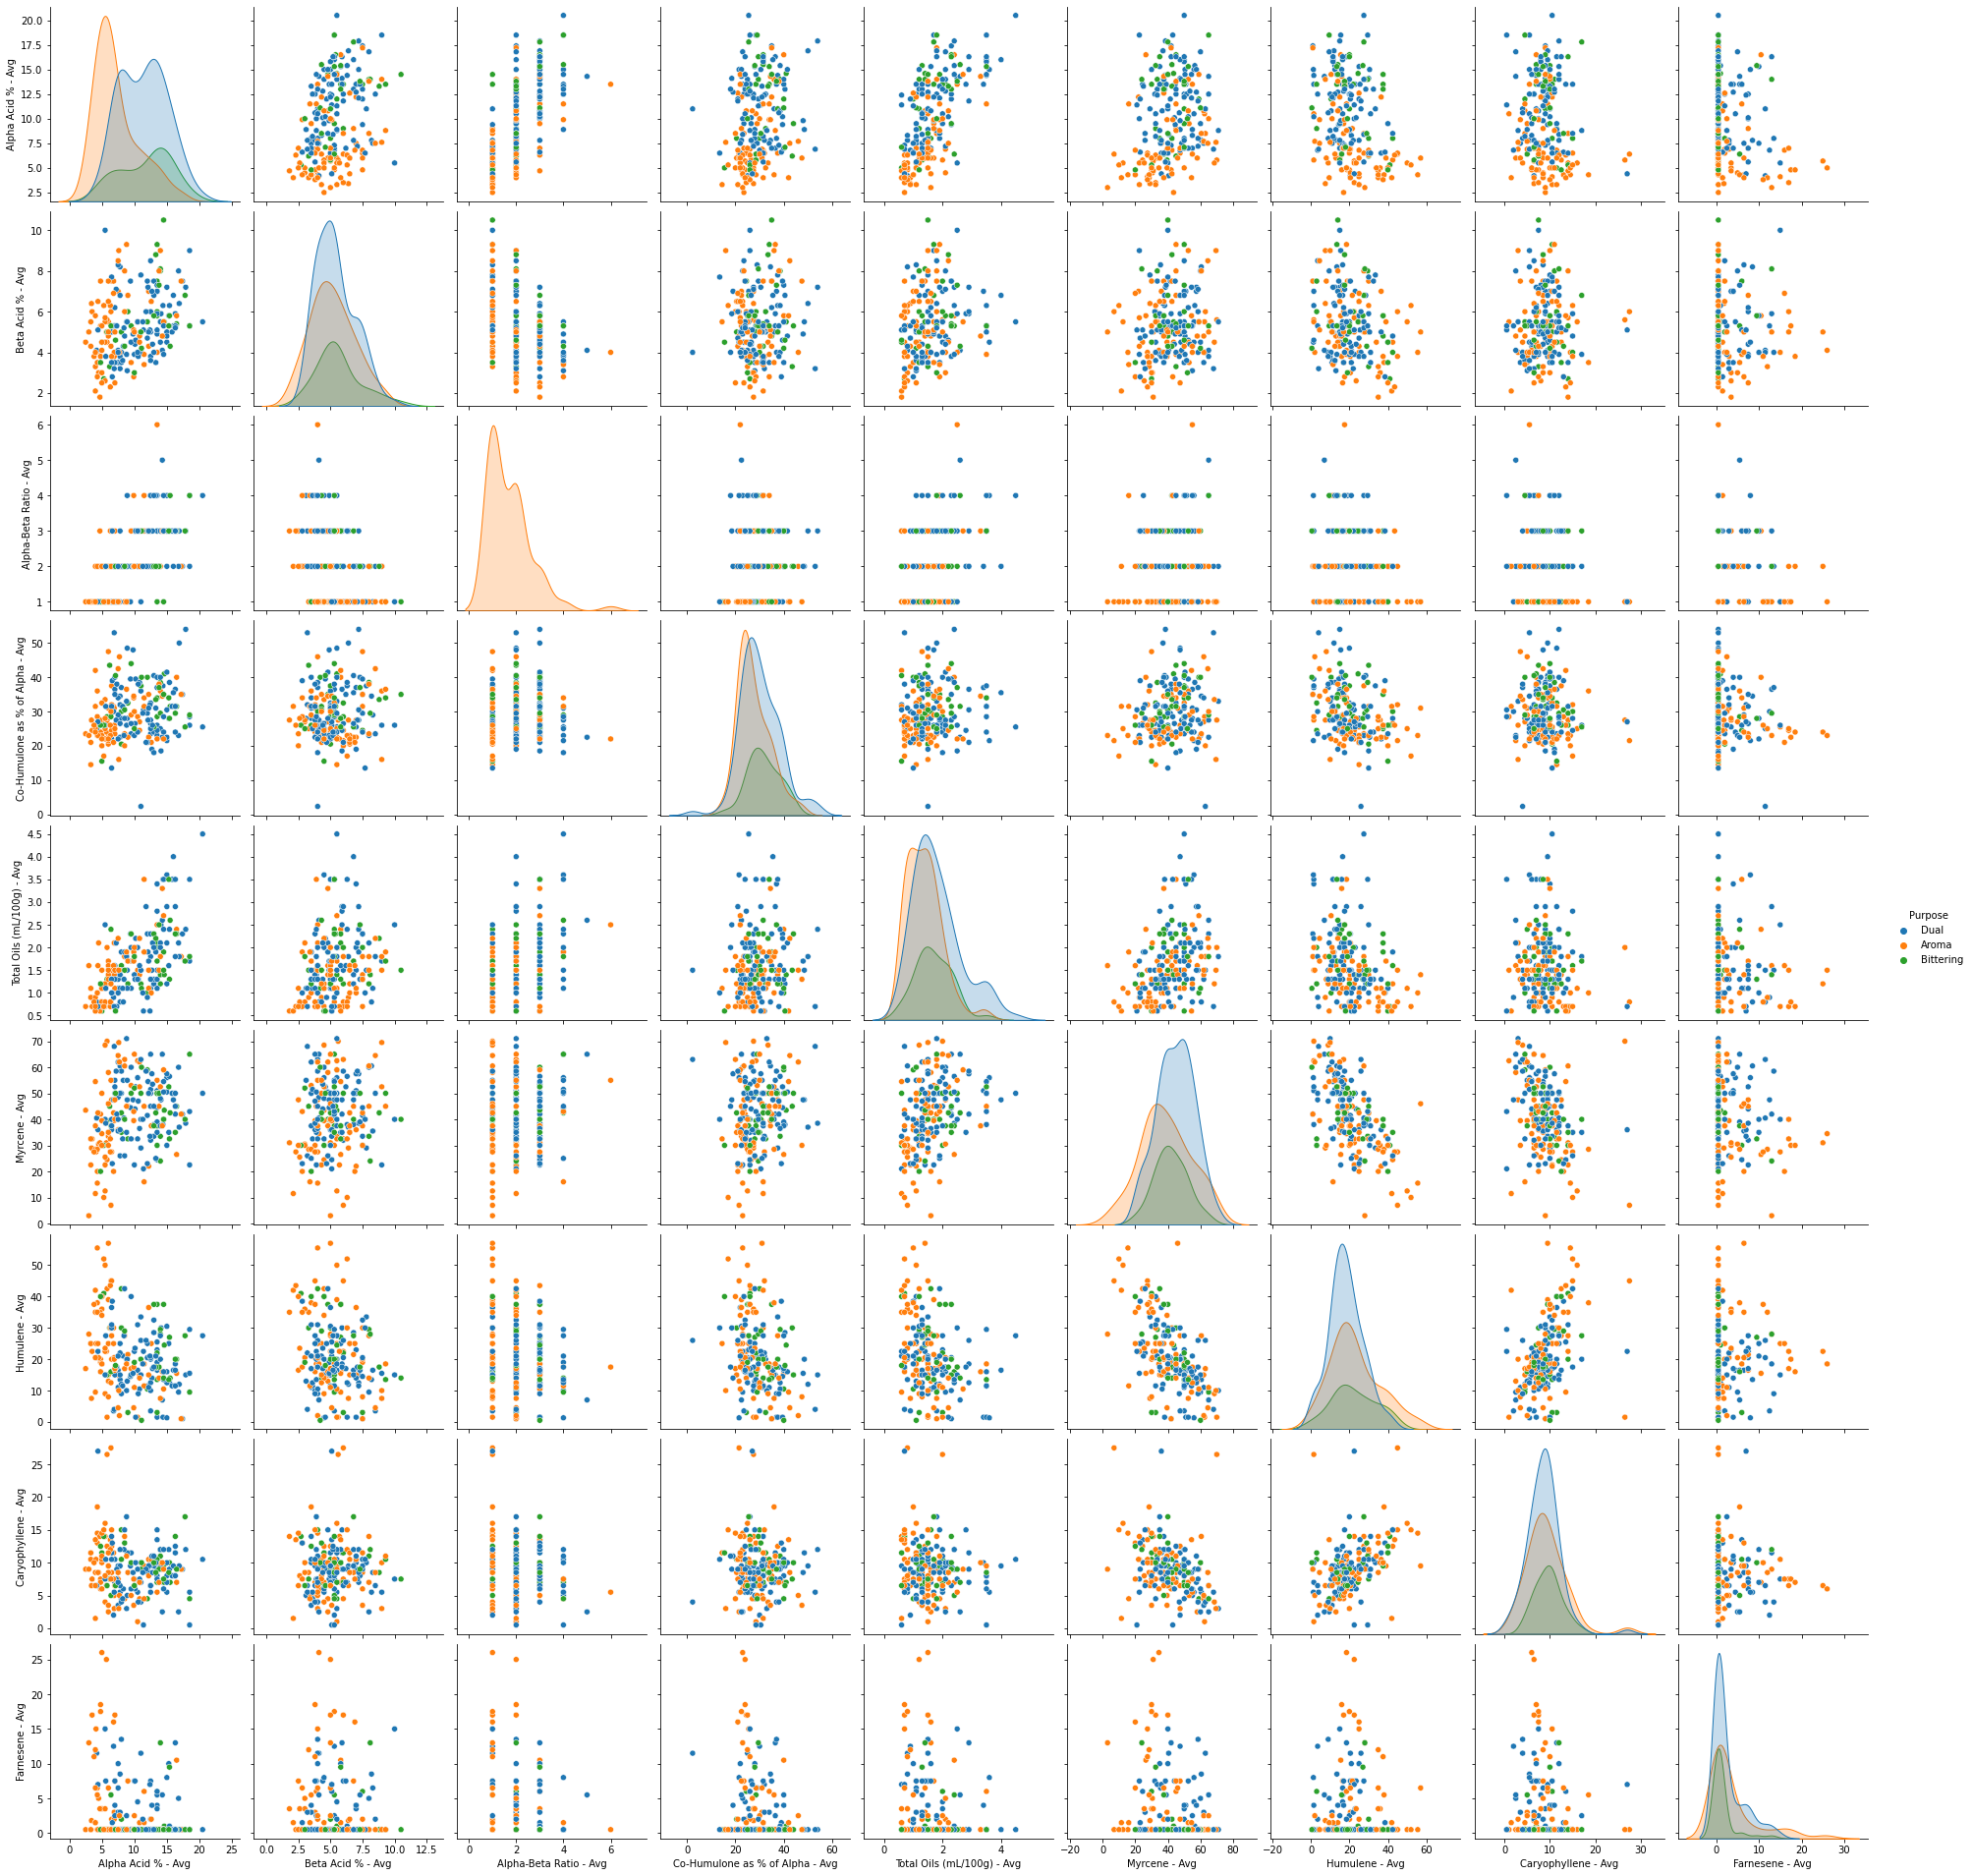

In [237]:
fig = sns.pairplot(hops_bv, height=3, hue='Purpose')
fig.savefig('images/Pairplot_purpose.png') 

From this plot, it is most notable the Alpha Acid percentage and the alpha-beta ratio are the most significantly different from one in other regarding purpose. The peaks of the colored curves in the top left plot are significantly different with a bit of an overlap between bittering hops and dual purpose hops. This makes sense because dual purpose hops have the best of both worlds - aroma and bitter properties.

In the first row of plots, it can be observed that the aromatic hops (in orange) are somewhat clustered together as compare to the bittering and dual purpose hops, which are mostly layed over eachother.

Pairplot with Continent as the color

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\danon\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



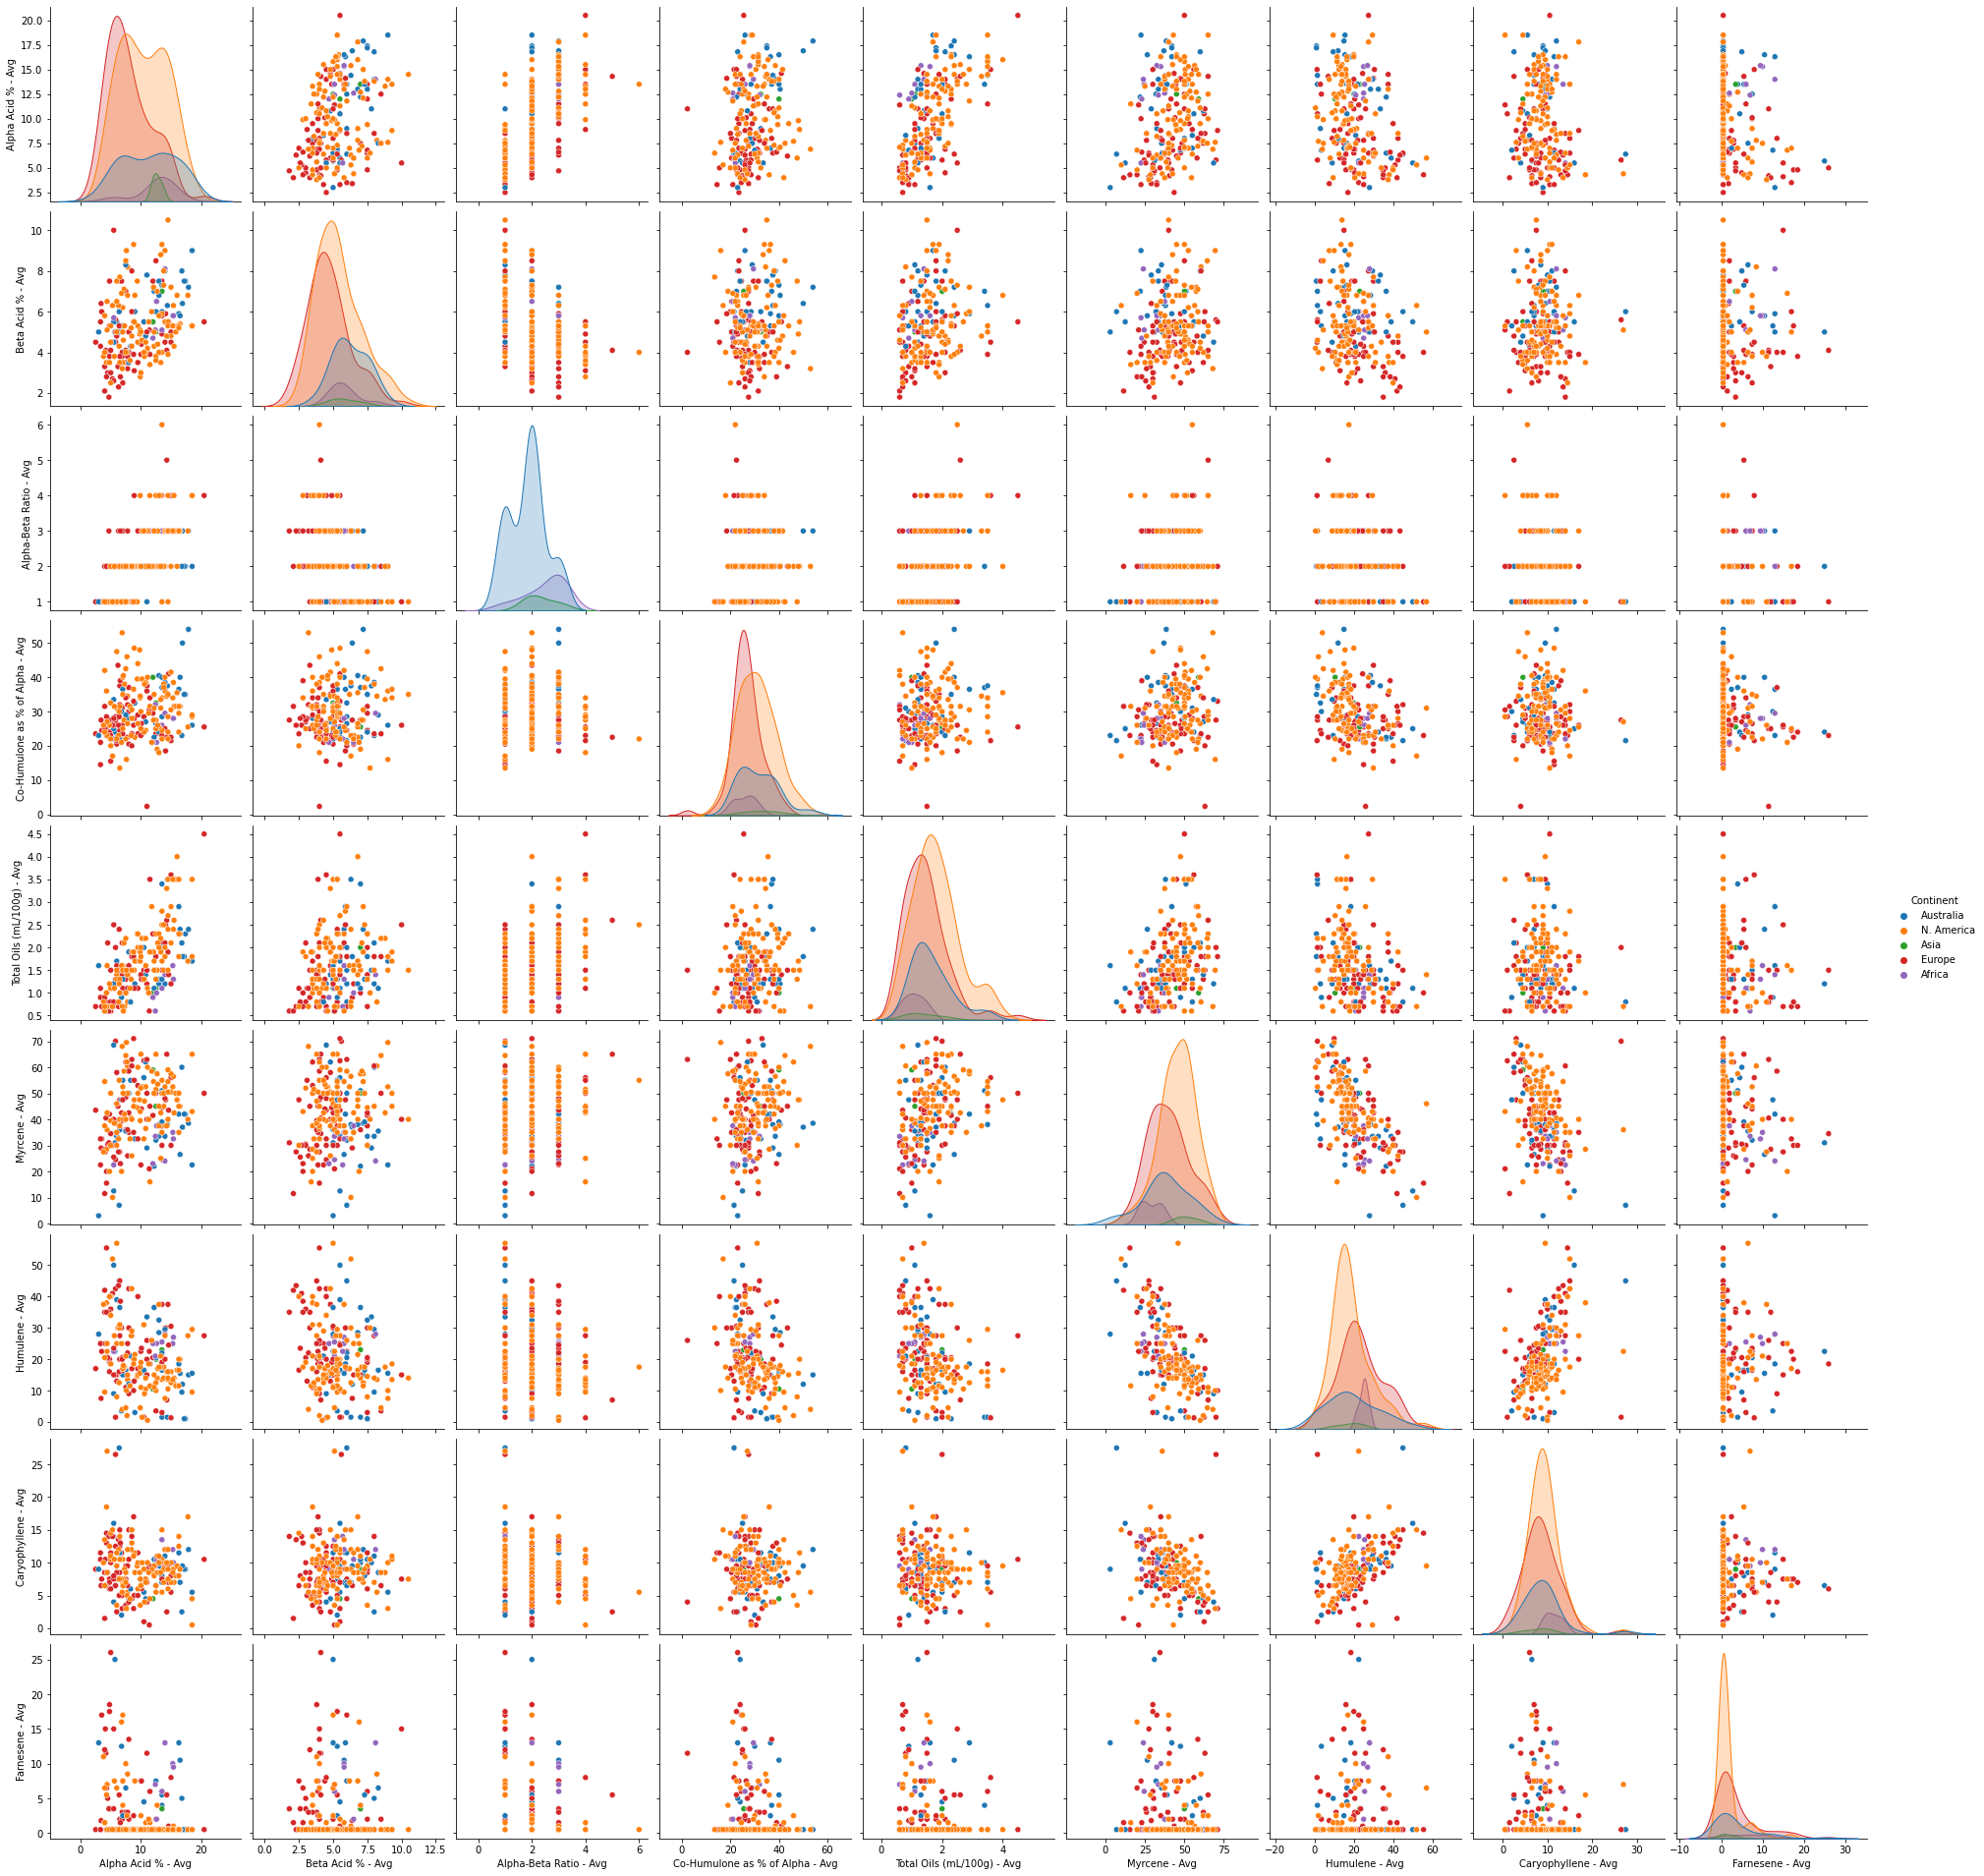

In [238]:
fig = sns.pairplot(hops_bv, height=3, hue='Continent')
fig.savefig('images/Pairplot_country.png') 

<!-- hops_bv['Alpha-Beta Ratio - Avg'].replace(np.inf, np.nan, inplace=True)
hops_bv[ hops_bv['Alpha-Beta Ratio - Avg'] == np.inf]
hops_bv = hops_bv.dropna(axis=0) -->

**Alpha Acids and Bitterness**

Alpha acids (α acids) are a class of chemical compounds found in the resin glands of the hop plant flowers. They are the source of bitterness in beer, and they possess anti-bacterial properties. The bitterness level is a result of a process called isomerization which happens in the boiling stage of the brewing process. The degree of isomerization and hence the bitterness are highly dependent on the length of time the hops are boiled. Longer boil times result in isomerization of more alpha acids and therefore increase the bitterness. 

In [239]:
fig = px.bar(hops_bv, y='Alpha Acid % - Avg', orientation='v',
             color='Purpose', title='Bitterness in Hops', height=800, hover_data=['Continent'])
fig.update_layout(title={
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis={'categoryorder': 'total ascending'})
fig.write_image("images/BitternessInHops.png")    
fig.show()


In plot above, the height of the bars represent the alpha acids % averages of each hop. The color of the bar represents the Purpose of the hop. As expected, the hops with lower alpha acid % (on the left side of the x-axis) are mostly for aromatic purposes. On the other side, with the higher alpha acid %, we have mostly dual purpose and bittering hops. This supports the notion that the oil and acid concentration in the hop can affect it's purpose.

To further inspect this the dataframe is grouped by 'Purpose', then each  group is averaged and the results are plotted.

In [240]:
hops_bv_purpose = hops_bv.groupby("Purpose").mean()

hops_bv_purpose

,Alpha Acid % - Avg,Beta Acid % - Avg,Alpha-Beta Ratio - Avg,Co-Humulone as % of Alpha - Avg,Total Oils (mL/100g) - Avg,Myrcene - Avg,Humulene - Avg,Caryophyllene - Avg,Farnesene - Avg
Purpose,,,,,,,,,
Aroma,7.200000,5.152500,1.7,27.537500,1.372500,38.606250,22.793750,9.193750,3.810000
Bittering,11.677143,5.622857,inf,31.557143,1.691429,41.828571,22.371429,9.600000,1.471429
Dual,11.378571,5.372449,inf,30.069388,1.810204,44.571429,18.202041,8.556122,2.678571


The average alpha acid % is significantly lower in the aromatic hops, as compared to the bittering and dual purpose hops. This make sense as to why the are labelled as such.

In [241]:
fig = px.bar(hops_bv_purpose, y="Alpha Acid % - Avg", orientation='v',
             color=hops_bv_purpose.index, width=500, height=500,
             title="Alpha Acids and Bitterness")
fig.update_layout(title={
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis={'categoryorder': 'total ascending'})
fig.write_image("images/BitternessInHops.png")        
fig.show()


In order to study the correlation of the variables to one another, a heatmap is created.

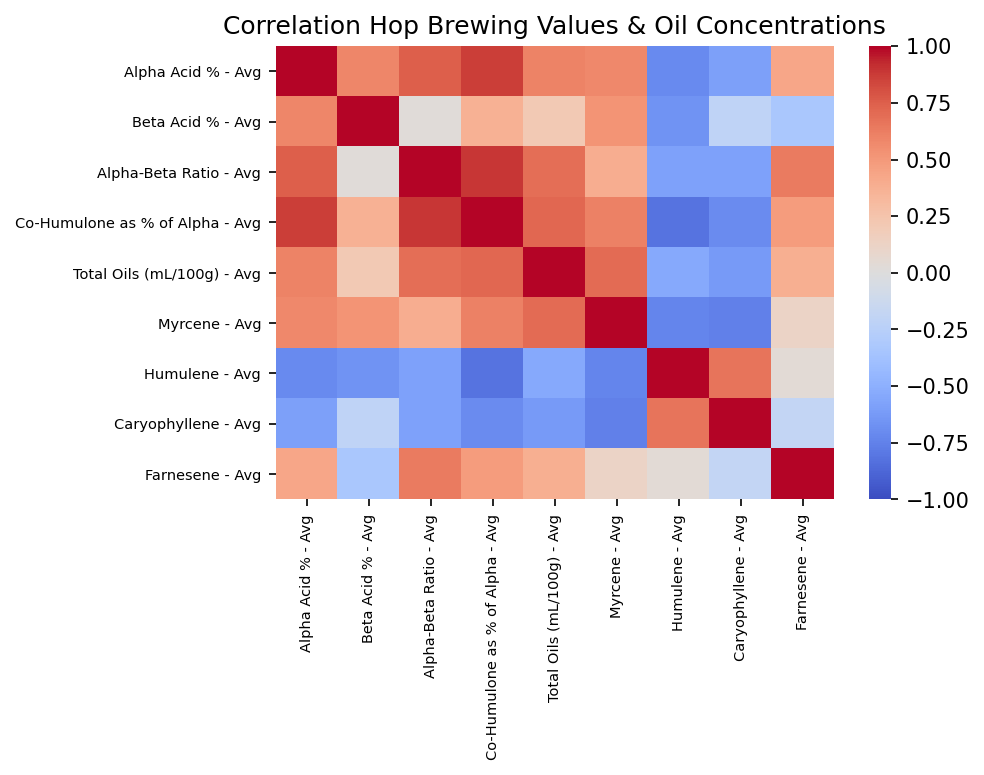

In [242]:
plt.figure(dpi=150)
fig = sns.heatmap(hops_bv[:9].corr(), cmap='coolwarm', vmax=1,
            vmin=-1, xticklabels=True, yticklabels=True)
plt.title("Correlation Hop Brewing Values & Oil Concentrations")
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.savefig('images/heatmap.png', dpi=200, bbox_inches = "tight")
plt.show()


From the plot it can be seen that some variables are more correlated than others. A strong positive correlation is indicated by the darker red squares, while a strong positive correlation is indicated by the darker blue. The most signifcant positive correlations include:
- 'Co-Humulone as % of Alpha - Avg' with 'Alpha Acid % - Avg'
- 'Co-Humulone as % of Alpha - Avg' with 'Alpha-Beta Ratio - Avg'
- 'Farnesene - Avg' with 'Alpha-Beta Ratio - Avg'

The most significant negative correlations include:
- 'Co-Humulone as % of Alpha - Avg' with 'Humulene - Avg'
- 'Alpha Acid % - Avg' with 'Humulene - Avg'
- Crayophyllene - Avg, with Myrcene

### Aroma Tag Analysis

Make a dataframe consisting of the aroma tags, 'Country', 'Purpose', and 'Continent'. Then drop rows with NAs:

In [243]:
hops_tags = hops_p.copy()
hops_tags['Continent'] = hops_tags['Country'].copy()
hops_tags['Continent'].replace({
    'Australia': 'Australia',
    'Canada': 'N. America',
    'China': 'Asia',
    'Czech Republic': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Japan': 'Asia',
    'New Zealand': 'Australia',
    'Poland': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States of America': 'N. America'},
    inplace=True)

hops_tags = hops_tags.dropna(axis=0)

hops_tags.head()


,Purpose,Country,alfalfa,allspice,almond,anise,apple,apricot,balsamic,banana,...,watermelon,whiskey,white_grape,white_wine,wild,wine,woody,yogurt,zest,Continent
Hop Name,,,,,,,,,,,,,,,,,,,,,
Astra,Dual,Australia,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Australia
Eclipse,Dual,Australia,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Australia
Ella,Dual,Australia,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Australia
Enigma,Aroma,Australia,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Australia
Galaxy,Dual,Australia,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Australia


In order to calculate the most used tags for each continent, the dataframe hops_tag is grouped by 'Continent' and saved as a new dataframe hops_tag_g. The False/True are replaced by 0/1 and the columns are sumed. 

In [244]:
hops_tags_g = hops_tags.copy()
hops_tags_g = hops_tags_g.replace({False:0, True:1})
hops_tags_g = hops_tags_g.groupby('Continent').sum()
hops_tags_g

,alfalfa,allspice,almond,anise,apple,apricot,balsamic,banana,berry,bitter,...,violet,watermelon,whiskey,white_grape,white_wine,wild,wine,woody,yogurt,zest
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,1
Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Australia,0,0,0,1,0,3,0,0,2,0,...,0,0,0,0,3,0,0,2,0,3
Europe,0,0,1,3,1,6,0,3,6,1,...,1,0,0,1,2,0,1,3,0,0
N. America,1,1,0,1,2,7,1,1,9,1,...,0,5,1,0,2,1,1,11,1,5


For each continent, the 5 most used aroma tags are printed and plotted:

In [245]:
for i in hops_tags_g.index:
    # print(hops_tags_g[hops_tags_g.index == i])
    count = hops_tags_g[hops_tags_g.index == i].copy().sum()
    count = count.astype('int32')
    count = count.nlargest(n=5, keep='first')
    print(f"5 most used Aroma tags for {i}:")
    print(", ".join(count.index))
    print()
    fig = px.bar(count, title=i, color=count.index)
    fig.write_image(f"images/MostUsedHops_{i}.png")    
    fig.show()

5 most used Aroma tags for Africa:
citrus, floral, herbal, lemongrass, berry



5 most used Aroma tags for Asia:
citrus, lemon, tobacco, dill, earthy



5 most used Aroma tags for Australia:
citrus, tropical_fruit, pine, passion_fruit, floral



5 most used Aroma tags for Europe:
floral, spicy, citrus, herbal, fruity



5 most used Aroma tags for N. America:
citrus, floral, spicy, pine, grapefruit



An alternative approach to calculate the most used aroma tags per continent is presented below. 

Inspect the the value counts in hops_tags. Drop columns that have less than 20 True entries. This leaves a dataset with the 21 most used aroma profiles.

In [246]:
# TOP 21

for i in hops_tags.columns[2:-1]:
    if hops_tags[i].value_counts()[True] < 20:
        hops_tags = hops_tags.drop([i], axis=1)
hops_tags


,Purpose,Country,black_pepper,citrus,earthy,floral,fruity,grapefruit,grassy,herbal,...,orange,passion_fruit,peach,pine,pineapple,resin,spicy,stone_fruit,tropical_fruit,Continent
Hop Name,,,,,,,,,,,,,,,,,,,,,
Astra,Dual,Australia,False,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,Australia
Eclipse,Dual,Australia,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,Australia
Ella,Dual,Australia,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,Australia
Enigma,Aroma,Australia,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,Australia
Galaxy,Dual,Australia,False,True,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,True,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zappa,Aroma,United States of America,False,True,False,False,True,False,False,False,...,False,True,False,True,False,False,True,False,True,N. America
Zenia,Dual,United States of America,False,True,False,False,True,False,False,False,...,True,False,False,True,False,True,False,False,False,N. America
Zenith,Bittering,United States of America,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,N. America


Create a bar plot to display the 21 most used aroma profiles.

In [247]:
aroma_count = hops_tags.sum()

fig = px.bar(x=aroma_count.index[2:-1], y=aroma_count.values[2:-1],
             title='21 Most Popular Aroma Tags', height=750, color=aroma_count.index[2:-1], 
             labels={
             "x": "Aroma Tag",
             "y": "Count"
             })

fig.update_layout(title={
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis={'categoryorder': 'total descending'})
fig.write_image("images/21MostUsedHops.png")        
fig.show()


Further cut down the dataset to only have the 6 most used aroma profiles: citrus, floral, spicy, pine, herbal, and fruity.

In [248]:
# TOP 6

for i in hops_tags.columns[2:-1]:
    if hops_tags[i].value_counts()[True] < 50:
        hops_tags = hops_tags.drop([i], axis=1)

hops_tags

,Purpose,Country,citrus,floral,fruity,herbal,pine,spicy,Continent
Hop Name,,,,,,,,,
Astra,Dual,Australia,False,False,False,False,False,False,Australia
Eclipse,Dual,Australia,True,False,False,False,True,False,Australia
Ella,Dual,Australia,False,True,False,False,False,True,Australia
Enigma,Aroma,Australia,False,False,False,False,False,False,Australia
Galaxy,Dual,Australia,True,False,False,False,False,False,Australia
...,...,...,...,...,...,...,...,...,...
Zappa,Aroma,United States of America,True,False,True,False,True,True,N. America
Zenia,Dual,United States of America,True,False,True,False,True,False,N. America
Zenith,Bittering,United States of America,True,True,False,False,False,False,N. America


Group hops_tags dataframe by Continent.

In [249]:
hops_tags_group = hops_tags.groupby("Continent").sum()


Drop the columns 'Purpose' and 'Country'. Also drop the gouping for 'Asia' since it has very little entries.

In [250]:
hops_tags_group = hops_tags_group.drop(['Purpose', 'Country'], axis=1)
hops_tags_group = hops_tags_group.drop(['Asia'], axis=0)
hops_tags_group


,citrus,floral,fruity,herbal,pine,spicy
Continent,,,,,,
Africa,7,4,2,3,0,1
Australia,16,9,5,4,14,8
Europe,38,40,20,24,13,39
N. America,65,56,24,24,30,40


Use the grouped dataframe to plot the breakdown of the 6 most used hop aromas in each continent.

In [251]:
fig = px.bar(hops_tags_group, title="6 Most Popular Aromas - Breakdown per Continent", width=600, height=750, labels={
    "value": "Count", "variable": "Aroma Tag"})
fig.update_layout(title={
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    xaxis={'categoryorder': 'total ascending'})
fig.write_image("images/AromasPerContinent.png")
fig.show()


Create a smaller dataframe from hops_bv to only include the Oil Concentration Averages of each hop and the Continent

In [252]:
hops_bv_sm = hops_bv.drop(['Purpose', 'Country'], axis=1)

hops_bv_sm = hops_bv_sm.drop(['Alpha Acid % - Avg', 'Beta Acid % - Avg', 'Alpha-Beta Ratio - Avg',
            'Co-Humulone as % of Alpha - Avg', 'Total Oils (mL/100g) - Avg'], axis=1).copy()
hops_bv_sm.head()


,Myrcene - Avg,Humulene - Avg,Caryophyllene - Avg,Farnesene - Avg,Continent
Hop Name,,,,,
Eclipse,42.0,1.0,9.0,0.5,Australia
Ella,42.0,18.5,11.5,13.0,Australia
Enigma,26.5,15.5,7.0,10.5,Australia
Galaxy,51.0,1.5,10.0,4.0,Australia
Helga,7.0,45.0,27.5,0.5,Australia


Breakdown of the oil concentration in each hop. Click on the oil in the legend to show/hide.

Myrcene and Humulene are the most present oils in the hops. These are responsible for 

In [253]:
fig = px.bar(hops_bv_sm, orientation='h', width=750,
             height=1500, hover_data=['Continent'],
             title='Oil Concentration in Hops',
             labels={'variable':'Oils', 'value':'Total Oil Breakdown (%)'}
             )
fig.update_layout(title={
    'y': .95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    yaxis={'categoryorder': 'total descending'})
fig.write_image("images/OilsInHops.png")
fig.show()


Same process but ths time for breakdown of the acid concentration in each hop. Click on the oil in the legend to show/hide.

In [254]:
hops_bv_sm2 = hops_bv.copy()
hops_bv_sm2 = hops_bv_sm2.drop(['Myrcene - Avg', 'Humulene - Avg', 'Caryophyllene - Avg',
            'Farnesene - Avg', 'Total Oils (mL/100g) - Avg', 'Total Oils (mL/100g) - Avg', 'Alpha-Beta Ratio - Avg',
            'Co-Humulone as % of Alpha - Avg'], axis=1).copy()
hops_bv_sm2            

,Alpha Acid % - Avg,Beta Acid % - Avg,Purpose,Country,Continent
Hop Name,,,,,
Eclipse,17.4,7.5,Dual,Australia,Australia
Ella,16.3,5.9,Dual,Australia,Australia
Enigma,16.5,5.8,Aroma,Australia,Australia
Galaxy,13.5,7.0,Dual,Australia,Australia
Helga,6.4,6.0,Aroma,Australia,Australia
...,...,...,...,...,...
Zamba Blend,10.0,5.0,Aroma,USA,N. America
Zappa,7.5,8.5,Aroma,USA,N. America
Zenith,10.0,3.0,Bittering,USA,N. America


In [255]:
fig = px.bar(hops_bv_sm2, orientation='h', width=750,
             height=1500, hover_data=['Continent', 'Purpose', 'Country'],
             title='Acids in Hops',
             labels={'variable':'Acids', 'value':'Acid %'}
             )
fig.update_layout(title={
    'y': .95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    yaxis={'categoryorder': 'total descending'})
fig.write_image("images/AcidsInHops.png")
fig.show()

In [299]:

hops_group = hops_bv_sm.groupby('Continent').mean()
hops_group1 = hops_group.drop(['Asia', 'Australia', 'Europe'])
hops_group2 = hops_group.drop(['N. America', 'Asia', 'Africa'])

fig1 = px.bar(hops_group1, width=500, height=500,
              title="Average Oil Concentration",
              labels={'variable':'Oils', 'value':'Oil %'})
fig1.update_layout(title={
    'y': .9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'})
fig1.show()

fig2 = px.bar(hops_group2, width=500, height=500,
              title="Average Oil Concentration",
              labels={'variable':'Oils', 'value':'Oil %'})
fig2.update_layout(title={
    'y': .9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'})
fig2.show()
